In [1]:
import pandas as pd
import numpy as np

ncolumns = ['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 
            'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 
            'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted wines', 'Proline']
p = pd.read_csv('wineData.txt', sep=',', names = ncolumns)

p.info()
print()
p.describe(include='all').transpose()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315_of_diluted wines  178 non-null    float64
 13  Proli

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


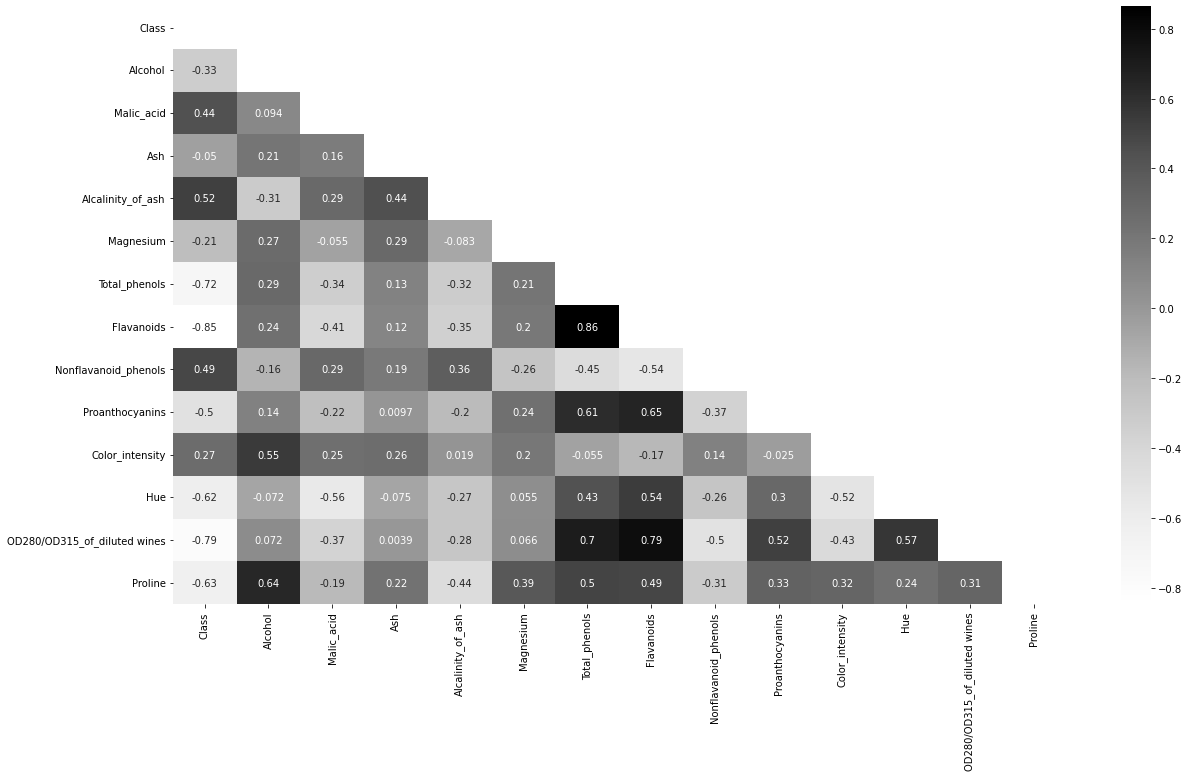

Class                           1.000000
Total_phenols                   0.719163
Flavanoids                      0.847498
Hue                             0.617369
OD280/OD315_of_diluted wines    0.788230
Proline                         0.633717
Name: Class, dtype: float64

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,11))
cor = p.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, mask=mask, annot=True, cmap=plt.cm.Greys)
plt.show()

cor_target = abs(cor["Class"])
relevant_features = cor_target[cor_target>0.6]
relevant_features

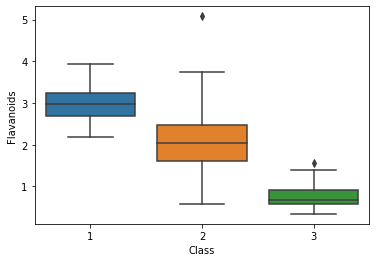

In [3]:
sns.boxplot(y='Flavanoids', x='Class',data=p)
plt.ylabel('Flavanoids')
plt.show()

In [4]:
X = p.drop(['Class'], axis=1)
yy = p.pop('Class').astype('int16')

In [5]:
# Model de classificació per arbres de decisió amb tota la mostra

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, balanced_accuracy_score

modeldt1 = DecisionTreeClassifier(class_weight='balanced', random_state=42)

modeldt1.fit(X, yy)
y_pred = modeldt1.predict(X)

print('accuracy:', accuracy_score(yy, y_pred))
print("precision:", precision_score(yy, y_pred, average='weighted'))
print('recall:', recall_score(yy, y_pred, average='weighted'))
print("F1:",f1_score(yy, y_pred, average='weighted'))
print("matriu:",confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#segurament sobreajust del model

accuracy: 1.0
precision: 1.0
recall: 1.0
F1: 1.0
matriu: [[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        71
           3       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



In [6]:
# Model de classificació per K Neighbors amb tota la mostra
from sklearn.neighbors import KNeighborsClassifier

modelKN1 = KNeighborsClassifier(weights = 'distance')
modelKN1.fit(X, yy)
y_pred = modelKN1.predict(X)

print('accuracy:', accuracy_score(yy, y_pred))
print("precision:", precision_score(yy, y_pred, average='weighted'))
print('recall:', recall_score(yy, y_pred, average='weighted'))
print("F1:",f1_score(yy, y_pred, average='weighted'))
print("matriu:",confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#segurament sobreajust del model

accuracy: 1.0
precision: 1.0
recall: 1.0
F1: 1.0
matriu: [[59  0  0]
 [ 0 71  0]
 [ 0  0 48]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        71
           3       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



In [7]:
# # Model de classificació per SVC amb tota la mostra

from sklearn import svm

modelSVC1 = svm.SVC(degree=2, random_state=42)
modelSVC1.fit(X, yy)
y_pred = modelSVC1.predict(X)

print('accuracy:', accuracy_score(yy, y_pred))
print("precision:", precision_score(yy, y_pred, average='weighted'))
print('recall:', recall_score(yy, y_pred, average='weighted'))
print("F1:",f1_score(yy, y_pred, average='weighted'))
print("matriu:",confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#segurament sobreajust del model tot i que el model no fa les prediccions correctes totalment

accuracy: 0.7078651685393258
precision: 0.7035205992509362
recall: 0.7078651685393258
F1: 0.7052351921622689
matriu: [[52  0  7]
 [ 4 52 15]
 [ 3 23 22]]
              precision    recall  f1-score   support

           1       0.88      0.88      0.88        59
           2       0.69      0.73      0.71        71
           3       0.50      0.46      0.48        48

    accuracy                           0.71       178
   macro avg       0.69      0.69      0.69       178
weighted avg       0.70      0.71      0.71       178



In [8]:
#Optimització de paràmetres pel DecisionTree

from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 15, 25],
    'min_samples_leaf': [1, 3],
    'max_leaf_nodes': [10, 20, 35, 50],
    'criterion': ['gini', 'entropy', 'log_loss']}
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
gsdt1 = GridSearchCV(dt, param_grid, scoring='f1_weighted', cv=5)
gsdt1.fit(X, yy)
print("Millors paràmetres:", gsdt1.best_params_)
print("Millor puntuació:", gsdt1.best_score_)

# segurament encara sobreajustat

Millors paràmetres: {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 3}
Millor puntuació: 0.9317104812951363


In [9]:
#Optimització de paràmetres pel KNeighbors

param_grid = {'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'n_neighbors': [1, 3, 5 , 10],
    'leaf_size': [20, 30, 40, 50]}
dt = KNeighborsClassifier(weights = 'distance')
gskn1 = GridSearchCV(dt, param_grid, scoring='f1_weighted', cv=5)
gskn1.fit(X, yy)
print("Millors paràmetres:", gskn1.best_params_)
print("Millor puntuació:", gskn1.best_score_)

# segurament encara sobreajustat

Millors paràmetres: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 1}
Millor puntuació: 0.7219696386780786


In [10]:
#Optimització de paràmetres pel SVC

param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight': ['', 'balanced'],
    'cache_size': [100, 200, 400]}
dt = svm.SVC(degree=2, random_state=42)
gssvc1 = GridSearchCV(dt, param_grid, scoring='f1_weighted', cv=5)
gssvc1.fit(X, yy)
print("Millors paràmetres:", gssvc1.best_params_)
print("Millor puntuació:", gssvc1.best_score_)

# segurament encara sobreajustat

Millors paràmetres: {'cache_size': 100, 'class_weight': '', 'kernel': 'linear'}
Millor puntuació: 0.9602483752018985


In [11]:
# Separació de les dades en train i test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, yy, random_state = 27, train_size = 0.7, stratify = yy)

In [12]:
# optimització del model DT separant les dades:

param_grid = {'max_depth': [5, 15, 25],
    'min_samples_leaf': [1, 3],
    'max_leaf_nodes': [10, 20, 35, 50],
    'criterion': ['gini', 'entropy', 'log_loss']}
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
gsdt2 = GridSearchCV(dt, param_grid, scoring='f1_weighted', cv=5)
gsdt2.fit(X_train, y_train)
print("Millors paràmetres:", gsdt2.best_params_)
print("Millor puntuació:", gsdt2.best_score_)

#L'optimització de paràmetres ha resultat diferent al separar les dades i amb millor puntuació

Millors paràmetres: {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 1}
Millor puntuació: 0.9599854916325505


In [13]:
#provar DecisionTree amb els paràmetres amb dades separades

modeldt2 = DecisionTreeClassifier(criterion='entropy', random_state=42, 
                               class_weight='balanced', max_depth= 5, max_leaf_nodes= 10, min_samples_leaf=1)

modeldt2.fit(X_train, y_train)
y_pred = modeldt2.predict(X_test)

print('accuracy:', accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred, average='weighted'))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print("F1:",f1_score(y_test, y_pred, average='weighted'))
print("matriu:",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

#al separar les dades es veu clarament que el model amb totes les dades estava sobreajustat

accuracy: 0.9259259259259259
precision: 0.929558745348219
recall: 0.9259259259259259
F1: 0.9259999201859667
matriu: [[17  1  0]
 [ 1 20  0]
 [ 1  1 13]]
              precision    recall  f1-score   support

           1       0.89      0.94      0.92        18
           2       0.91      0.95      0.93        21
           3       1.00      0.87      0.93        15

    accuracy                           0.93        54
   macro avg       0.93      0.92      0.93        54
weighted avg       0.93      0.93      0.93        54



In [14]:
#Optimització de paràmetres pel KNeighbors i amb les dades separades

param_grid = {'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'n_neighbors': [1, 3, 5 , 10],
    'leaf_size': [20, 30, 40, 50]}
dt = KNeighborsClassifier(weights = 'distance')
gskn2 = GridSearchCV(dt, param_grid, scoring='f1_weighted', cv=5)
gskn2.fit(X_train, y_train)
print("Millors paràmetres:", gskn2.best_params_)
print("Millor puntuació:", gskn2.best_score_)

# optimització ha dónat els mateixos valors dels paràmetres però millor puntuació

Millors paràmetres: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 1}
Millor puntuació: 0.7557128363896166


In [15]:
#provar KNeighbors amb els millors paràmetres i dades separades

modelKN2 = KNeighborsClassifier(weights = 'distance', leaf_size= 20, n_neighbors= 1)
modelKN2.fit(X_train, y_train)
y_pred = modelKN2.predict(X_test)

print('accuracy:', accuracy_score(y_test, y_pred))
print("precision:", precision_score(y_test, y_pred, average='weighted'))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print("F1:",f1_score(y_test, y_pred, average='weighted'))
print("matriu:",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# primer model amb totes les dades també sobreajustat

accuracy: 0.6851851851851852
precision: 0.7039473684210527
recall: 0.6851851851851852
F1: 0.6906862745098039
matriu: [[14  1  3]
 [ 2 13  6]
 [ 0  5 10]]
              precision    recall  f1-score   support

           1       0.88      0.78      0.82        18
           2       0.68      0.62      0.65        21
           3       0.53      0.67      0.59        15

    accuracy                           0.69        54
   macro avg       0.70      0.69      0.69        54
weighted avg       0.70      0.69      0.69        54



In [16]:
#Optimització de paràmetres pel SVC i amb dades separades

param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight': ['', 'balanced'],
    'cache_size': [100, 200, 400]}
dt = svm.SVC(degree=2, random_state=42)
gssvc2 = GridSearchCV(dt, param_grid, scoring='f1_weighted', cv=5)
gssvc2.fit(X_train, y_train)
print("Millors paràmetres:", gssvc2.best_params_)
print("Millor puntuació:", gssvc2.best_score_)

#valors dels paràmetres diferents però pitjor puntuació

Millors paràmetres: {'cache_size': 100, 'class_weight': 'balanced', 'kernel': 'linear'}
Millor puntuació: 0.9515712418300654


In [17]:
# provar SVC amb els millors paràmetres de dades separades

modelSVC2 = svm.SVC(kernel='linear', cache_size= 100, random_state=42, class_weight='balanced')
modelSVC2.fit(X_train, y_train)
y_pred = modelSVC2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:",recall_score(y_test, y_pred, average='weighted'))
print("F1:",f1_score(y_test, y_pred, average='weighted'))
print("matriu:",confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# es millora molt el primer model

Accuracy: 0.9444444444444444
Balanced Accuracy: 0.9444444444444445
Precision: 0.9513888888888888
Recall: 0.9444444444444444
F1: 0.9437710437710438
matriu: [[15  3  0]
 [ 0 21  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           1       1.00      0.83      0.91        18
           2       0.88      1.00      0.93        21
           3       1.00      1.00      1.00        15

    accuracy                           0.94        54
   macro avg       0.96      0.94      0.95        54
weighted avg       0.95      0.94      0.94        54



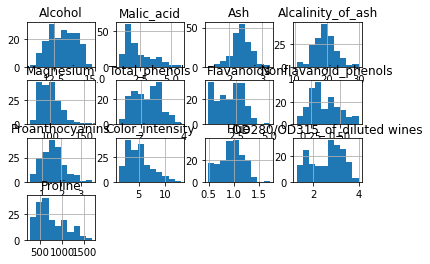

In [18]:
#veure la distribució de les variables
p.iloc[:, 0:13].hist()
plt.show()

In [19]:
#Preprocesament:
# Quantile per les variables que semblen +- bimodals
# Box-Cox per les variables +-desviades
# logaritme per les variables +-estirades
# estandaritzar totes al final

from sklearn_pandas import DataFrameMapper
from sklearn import preprocessing

mapper = DataFrameMapper([
    (['Flavanoids', 'OD280/OD315_of_diluted wines'], [preprocessing.QuantileTransformer(output_distribution='normal', random_state=0), preprocessing.StandardScaler()]),
    (['Alcohol', 'Ash', 'Magnesium', 'Total_phenols', 'Proanthocyanins', 'Color_intensity', 'Proline'], [preprocessing.PowerTransformer(method='box-cox', standardize=False), preprocessing.StandardScaler()]),
    (['Alcalinity_of_ash','Malic_acid','Nonflavanoid_phenols'], [preprocessing.FunctionTransformer(np.log1p, validate=True), preprocessing.StandardScaler()]),
    ([ 'Hue'], preprocessing.StandardScaler())])

X_train_transformed = pd.DataFrame(mapper.fit_transform(X_train), columns = ['Flavanoids', 'OD280/OD315_of_diluted wines', 'Alcohol', 'Ash', 'Magnesium', 
                                                                             'Total_phenols', 'Proanthocyanins', 'Color_intensity', 'Proline',
                                                                             'Alcalinity_of_ash','Malic_acid','Nonflavanoid_phenols', 'Hue'])

X_train_transformed.describe().transpose()

X_test_transformed = pd.DataFrame(mapper.transform(X_test), columns = ['Flavanoids', 'OD280/OD315_of_diluted wines', 'Alcohol', 'Ash', 'Magnesium', 
                                                                             'Total_phenols', 'Proanthocyanins', 'Color_intensity', 'Proline',
                                                                             'Alcalinity_of_ash','Malic_acid','Nonflavanoid_phenols', 'Hue'])

estimadors = [
        ("DT", DecisionTreeClassifier(criterion='entropy', random_state=42, 
                               class_weight='balanced', max_depth= 5, max_leaf_nodes= 10, 
                                  min_samples_leaf=1)),
        ("KN", KNeighborsClassifier(weights = 'distance', leaf_size = 20, n_neighbors = 1)
        ),
        ("SVC", svm.SVC(kernel='linear', cache_size= 100, random_state=42)
        )]

for i, (nom, clf) in enumerate(estimadors):
    clf.fit(X_train_transformed, y_train)      
    y_pred = clf.predict(X_test_transformed)
    
    print('Mètriques per', nom, ':')
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:",recall_score(y_test, y_pred, average='weighted'))
    print("F1:",f1_score(y_test, y_pred, average='weighted'))
    print("matriu:",confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    
# Els tres models milloran molt però el millor es el SVC

Mètriques per DT :
Accuracy: 0.9629629629629629
Balanced Accuracy: 0.9555555555555556
Precision: 0.966183574879227
Recall: 0.9629629629629629
F1: 0.9624819624819625
matriu: [[18  0  0]
 [ 0 21  0]
 [ 0  2 13]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       0.91      1.00      0.95        21
           3       1.00      0.87      0.93        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54


Mètriques per KN :
Accuracy: 0.9629629629629629
Balanced Accuracy: 0.9682539682539683
Precision: 0.9666666666666667
Recall: 0.9629629629629629
F1: 0.9630116959064329
matriu: [[18  0  0]
 [ 2 19  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           1       0.90      1.00      0.95        18
           2       1.00      0.90      0.95        21
           3       1.00      1.00 

C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (124). n_quantiles is set to n_samples.
  warnings.warn(


In [20]:
#remostreig de les classes excepte la majoritària
from collections import Counter
from imblearn.over_sampling import SMOTE 


sm = SMOTE(random_state=42, sampling_strategy='not majority')

X_train_smote, y_train_smote = sm.fit_resample(X_train_transformed , y_train)

print('Remostreig de cada classe %s' % Counter(y_train_smote))

Remostreig de cada classe Counter({1: 50, 2: 50, 3: 50})


In [21]:
#Comprobar si aquest procesament millora els models

estimadors = [
        ("DT", DecisionTreeClassifier(criterion='entropy', random_state=42, 
                               class_weight='balanced', max_depth= 5, max_leaf_nodes= 10, 
                                  min_samples_leaf=1)),
        ("KN", KNeighborsClassifier(weights = 'distance', leaf_size = 20, n_neighbors = 1)
        ),
        ("SVC", svm.SVC(kernel='linear', cache_size= 100, random_state=42)
        )]

for i, (nom, clf) in enumerate(estimadors):
    clf.fit(X_train_smote, y_train_smote)      
    y_pred = clf.predict(X_test_transformed)
    
    print('Mètriques per', nom, ':')
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:",recall_score(y_test, y_pred, average='weighted'))
    print("F1:",f1_score(y_test, y_pred, average='weighted'))
    print("matriu:",confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    clf.score(X_test_transformed, y_test)
    print()
    
#No s'aconsegueix millorar cap dels tres models, de fet el model DT empitjora i els altres dos es queden igual

Mètriques per DT :
Accuracy: 0.9444444444444444
Balanced Accuracy: 0.9396825396825396
Precision: 0.9471026049973418
Recall: 0.9444444444444444
F1: 0.9440179382039848
matriu: [[18  0  0]
 [ 1 20  0]
 [ 0  2 13]]
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       0.91      0.95      0.93        21
           3       1.00      0.87      0.93        15

    accuracy                           0.94        54
   macro avg       0.95      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54


Mètriques per KN :
Accuracy: 0.9629629629629629
Balanced Accuracy: 0.9682539682539683
Precision: 0.9666666666666667
Recall: 0.9629629629629629
F1: 0.9630116959064329
matriu: [[18  0  0]
 [ 2 19  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           1       0.90      1.00      0.95        18
           2       1.00      0.90      0.95        21
           3       1.00      1.00

In [ ]:
# ******El millor model sembla que és el SVC*****